# Symetric neuron

## 1. Dynamics


We are analyzing a system of two coupled ordinary differential equations:

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$


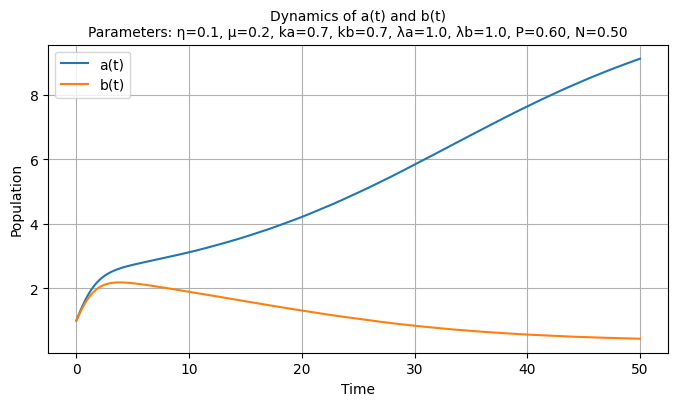

Output()

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output

# Fixed constants
eta = 0.1
mu = 0.2
ka = 0.7
kb = 0.7
lambda_a = 1.0
lambda_b = 1.0

# dydt function
def dydt(t, y, P, N):
    a, b = y
    da_dt = P + (lambda_a * a) / (1 + ka * a) - eta * a - mu * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta * b - mu * a * b
    return [da_dt, db_dt]

# Widgets
P_slider = widgets.FloatSlider(value=0.6, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Set up figure
fig, ax = plt.subplots(figsize=(8, 4))

# Function to update plot
def update(P, N):
    ax.clear()

    # Initial conditions and time span
    y0 = [1.0, 1.0]
    t_span = [0, 50]
    t = np.linspace(0, 50, 1000)

    # Solve ODE
    sol = solve_ivp(lambda t, y: dydt(t, y, P, N), t_span, y0, t_eval=t)

    # Plot results
    ax.plot(sol.t, sol.y[0], label='a(t)')
    ax.plot(sol.t, sol.y[1], label='b(t)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    
    # Build title with all fixed parameters
    title_text = (
        f"Dynamics of a(t) and b(t)\n"
        f"Parameters: η={eta}, μ={mu}, ka={ka}, kb={kb}, λa={lambda_a}, λb={lambda_b}, "
        f"P={P:.2f}, N={N:.2f}"
    )
    ax.set_title(title_text, fontsize=10)
    ax.legend()
    ax.grid(True)

    # Refresh output
    with output:
        clear_output(wait=True)
        display(fig)

# Initial plot
update(P_slider.value, N_slider.value)

# Link widgets
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)

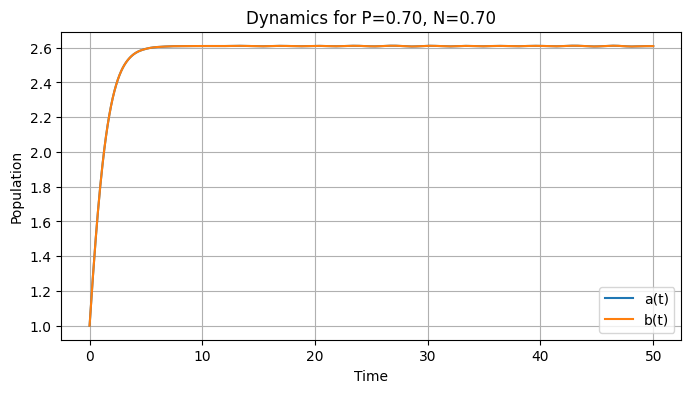
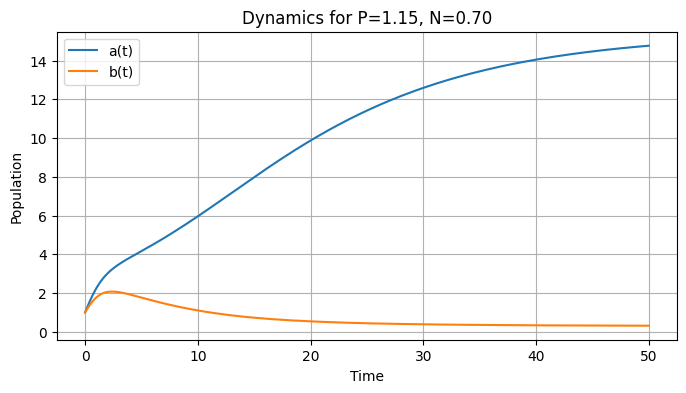
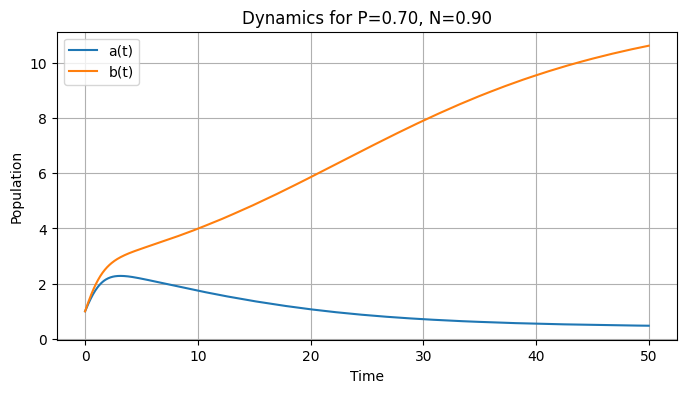

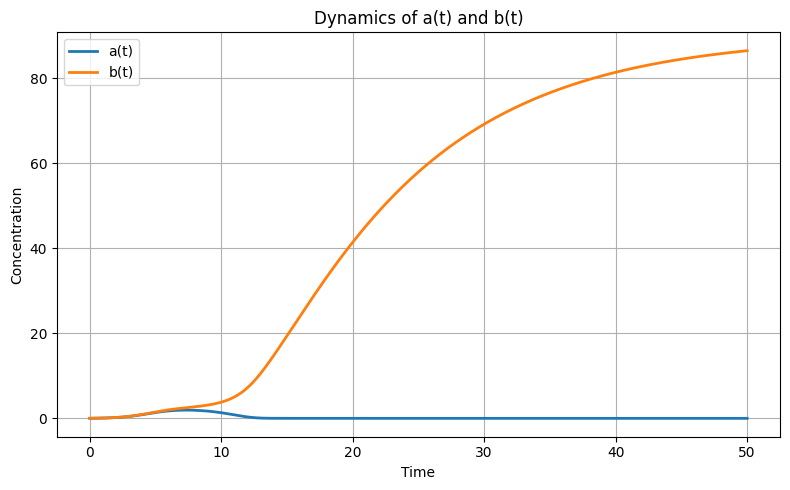

In [12]:
#With xin and xjp
"""
simulate_ab_constants.py

Integrates:
    da/dt = P + λ a/(1 + kα a) − η a − μ a b
    db/dt = N + λ̃ b/(1 + kβ b) − η b − μ a b

where P = ∑ w_{p,i} x_{p,i} and N = ∑ w_{n,j} x_{n,j} are fixed constants.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# === FIXED INPUTS AND WEIGHTS ===
# (edit these four constants as needed)
x_p = [1.0, 0.3]      # x_{p,1}, x_{p,2}
w_p = [0.017,0.025]      # w_{p,1}, w_{p,2}

x_n = [0.8, 0.5]      # x_{n,1}, x_{n,2}
w_n = [0.017, 0.0258]      # w_{n,1}, w_{n,2}

# Precompute the constant source terms P and N:
P = w_p[0]*x_p[0] + w_p[1]*x_p[1]
N = w_n[0]*x_n[0] + w_n[1]*x_n[1]

# === KINETIC PARAMETERS ===
lambda_a = 1.0    # λ
k_alpha  = 0.1    # k_α
lambda_b = 1.0    # λ̃
k_beta   = 0.1    # k_β
eta      = 0.1    # η
mu       = 0.3   # μ

# === ODE SYSTEM ===
def odes(t, y):
    a, b = y
    da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
    db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
    return [da, db]

# === INITIAL CONDITIONS & TIME GRID ===
y0     = [0.01, 0.01]               # [a(0), b(0)]
t_span = (0.0, 50.0)              # time interval
t_eval = np.linspace(*t_span, 1000)

# === INTEGRATION ===
sol = solve_ivp(
    odes,
    t_span,
    y0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-6,
    atol=1e-9
)

# === PLOTTING ===
plt.figure(figsize=(8, 5))
plt.plot(sol.t, sol.y[0], label='a(t)', linewidth=2)
plt.plot(sol.t, sol.y[1], label='b(t)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of a(t) and b(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



It seems to be a pure WTA dynamics. Indeed, if we introduce such a mutual symetric predation, then, both a and b are penalized the same way, and the only things that makes one of the 2 species to dominate is that the more there is a or b, the more the autocathalysis act. If all a and b constant are equal, then the winning substance only depends on initial concentrations of N and P. 

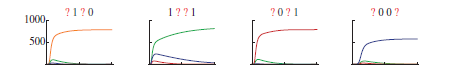
This is exactly like in the Rondelez 2013 article, with winner takes all (WTA).

### 2: Can we find configurations st the system is a bistable and not a WTA ?

Bistability means that the system can switch between two distincts stable outcome, and once the latter is reached, the system resits change (like a biological toggle switch).

- 1 stable fixed point : monostable, the system always go to the same state, whose eq value can move from a to b depending on N and P 

- 2 stables  fixed points and 1 unstable : bistable, the system can end up in either states

- no stable fixed point : no steady state.

For now, it seems we have a monostable WTA system. Depending on the N and P values, we end up on the same fixed point, whose value can be either a or b. 



We are analyzing a system of two coupled ordinary differential equations:

$$
\frac{da}{dt} = P + \frac{\lambda_a \cdot a}{1 + k_a \cdot a} - \eta_a \cdot a - \mu_a \cdot a b
$$
$$
\frac{db}{dt} = N + \frac{\lambda_b \cdot b}{1 + k_b \cdot b} - \eta_b \cdot b - \mu_b \cdot a b
$$

Where:
- $a, b$: dynamic variables (e.g., population levels, concentrations)
- $P, N$: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$

The Jacobian matrix $ J(a,b) $ is computed by taking partial derivatives of the right-hand sides with respect to $a$ and $b$.

Let:
- $ f(a,b) = \frac{da}{dt} $
- $ g(a,b) = \frac{db}{dt} $

Then the Jacobian is:

$$
J(a, b) =
\begin{bmatrix}
\frac{\partial f}{\partial a} & \frac{\partial f}{\partial b} \\
\frac{\partial g}{\partial a} & \frac{\partial g}{\partial b}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\lambda_a}{(1 + k_a a)^2} - \eta_a - \mu_a b & -\mu_a a \\
-\mu_b b & \frac{\lambda_b}{(1 + k_b b)^2} - \eta_b - \mu_b a
\end{bmatrix}
$$



- If all eigenvalues have negative real parts → **stable**
- If any eigenvalue has a positive real part → **unstable**

This helps identify whether the system is **monostable** (one stable fixed point) or **bistable** (two stable fixed points)



From our approximations, we can set that $\mu_a=\mu_b$ (symmetric predation) and $\eta_a=\eta_b$ (same degradation rate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.linalg import eigvals
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output
from matplotlib.lines import Line2D

# Parameters
eta_a = 0.1
eta_b = 0.1
mu_a = 0.2
mu_b = 0.2
k_a = 0.7
k_b = 0.7
lambda_a = 1.0
lambda_b = 1.0

# System equations
def da_dt(a, b, P):
    return P + (lambda_a * a) / (1 + k_a * a) - eta_a * a - mu_a * a * b

def db_dt(a, b, N):
    return N + (lambda_b * b) / (1 + k_b * b) - eta_b * b - mu_b * a * b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]

# Jacobian
def jacobian(a, b):
    dfda = (lambda_a / (1 + k_a * a)**2) - eta_a - mu_a * b
    dfdb = -mu_a * a
    dgda = -mu_b * b
    dgdb = (lambda_b / (1 + k_b * b)**2) - eta_b - mu_b * a
    return [[dfda, dfdb], [dgda, dgdb]]

# Meshgrid
a_vals = np.linspace(0.01, 20, 100)
b_vals = np.linspace(0.01, 20, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Sliders
P_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Update function
def update(P, N):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Derivatives
    DA = da_dt(A, B, P)
    DB = db_dt(A, B, N)

    # Nullclines
    ax.contour(A, B, DA, levels=[0], colors='red', linewidths=2)
    ax.contour(A, B, DB, levels=[0], colors='blue', linewidths=2)

    # Fixed points
    fixed_points = []
    seen = []

    for a_guess in a_vals:
        for b_guess in b_vals:
            try:
                sol = root(lambda y: system(y, P, N), [a_guess, b_guess], method='hybr')
                if sol.success:
                    a_sol, b_sol = sol.x
                    if a_sol > 0.01 and b_sol > 0.01:
                        if not any(np.hypot(a_sol - x, b_sol - y) < 0.3 for x, y in seen):
                            fixed_points.append((a_sol, b_sol))
                            seen.append((a_sol, b_sol))
            except:
                continue

    # Stability
    stable_fps = []
    unstable_fps = []

    for a, b in fixed_points:
        J = jacobian(a, b)
        evals = eigvals(J)
        if np.all(np.real(evals) < 0):
            stable_fps.append((a, b))
            ax.plot(a, b, 'go', markersize=8)
        else:
            unstable_fps.append((a, b))
            ax.plot(a, b, 'ro', markersize=8)

    # Title
    num_stable = len(stable_fps)
    num_unstable = len(unstable_fps)
    status = "Bistable" if num_stable >= 2 else "Monostable" if num_stable == 1 else "No Stable FP"

    ax.set_title(
        f"{status} System\n"
        f"P={P:.2f}, N={N:.2f}\n"
        f"Stable FPs: {num_stable}, Unstable: {num_unstable}\n"
        f"ηₐ={eta_a}, ηᵦ={eta_b}, μₐ={mu_a}, μᵦ={mu_b}, kₐ={k_a}, kᵦ={k_b}, λₐ={lambda_a}, λᵦ={lambda_b}"
    )
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.grid(True)

    custom_lines = [
        Line2D([0], [0], color='red', lw=2),
        Line2D([0], [0], color='blue', lw=2),
        Line2D([0], [0], color='green', lw=0, marker='o', markersize=8),
        Line2D([0], [0], color='red', lw=0, marker='o', markersize=8)
    ]
    ax.legend(custom_lines, [
        r'$\frac{da}{dt} = 0$',
        r'$\frac{db}{dt} = 0$',
        'Stable FP',
        'Unstable FP'
    ])

    plt.close(fig)
    with output:
        clear_output(wait=True)
        display(fig)

# Run once initially
update(P_slider.value, N_slider.value)

# Link sliders to update
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)


Output()

The a-nullcline and b-nullcline are drawn in red and blue and corresponds respectively to da/dt=0 and db/dt=0. Above the curve (da/dt>0), a is increasing, below, as is decreasing. A crossing between the 2 yields a fixed point.
There is indeed a bistability switch : the 2 stable fp are either a-dominance or b-dominance.

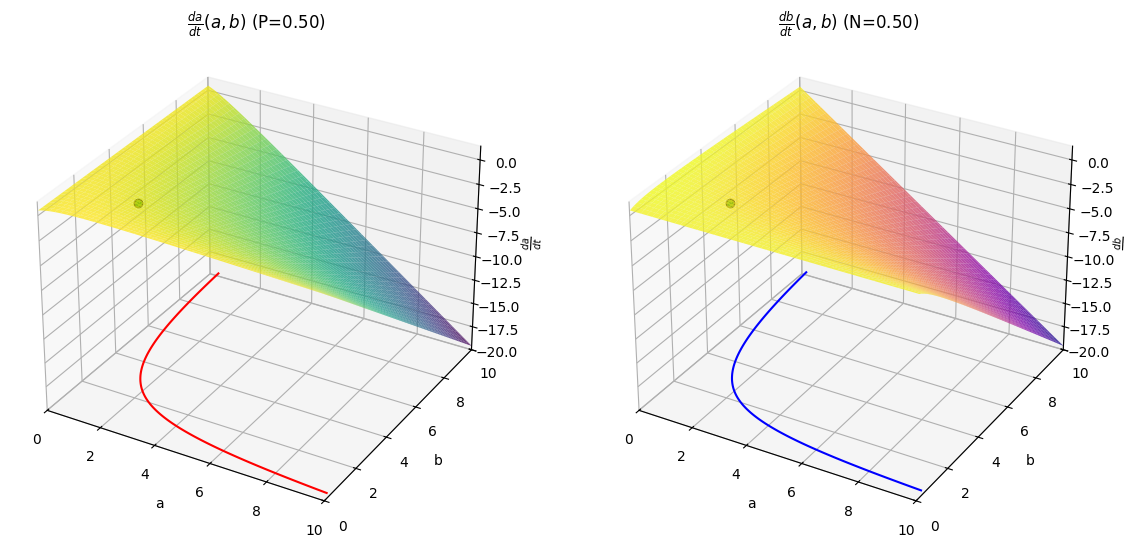

Output()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import root
from scipy.linalg import eigvals
from ipywidgets import widgets, interactive_output
from IPython.display import display, clear_output

# System equations
def da_dt(a, b, P):
    return P + a / (1 + a) - 0.1 * a - 0.2 * a * b

def db_dt(a, b, N):
    return N + b / (1 + b) - 0.1 * b - 0.2 * a * b

def system(y, P, N):
    a, b = y
    return [
        da_dt(a, b, P),
        db_dt(a, b, N)
    ]

# Jacobian matrix
def jacobian(a, b):
    dfda = 1 / (1 + a)**2 - 0.1 - 0.2 * b
    dfdb = -0.2 * a
    dgda = -0.2 * b
    dgdb = 1 / (1 + b)**2 - 0.1 - 0.2 * a
    return [[dfda, dfdb], [dgda, dgdb]]

# Create grid
a_vals = np.linspace(0.01, 10, 100)
b_vals = np.linspace(0.01, 10, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Set up 3D figure
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Sliders
P_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='P:')
N_slider = widgets.FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05, description='N:')
output = widgets.Output()

# Function to update plot
def update(P, N):
    ax1.clear()
    ax2.clear()

    # Compute derivatives over grid
    DA = da_dt(A, B, P)
    DB = db_dt(A, B, N)

    # Plot da/dt surface
    ax1.plot_surface(A, B, DA, cmap='viridis', alpha=0.8, edgecolor='none')
    ax1.contour(A, B, DA, levels=[0], colors='red', linestyles='solid', zdir='z', offset=np.min(DA))
    ax1.set_title(r'$\frac{da}{dt}(a, b)$' + f' (P={P:.2f})')
    ax1.set_xlabel('a')
    ax1.set_ylabel('b')
    ax1.set_zlabel(r'$\frac{da}{dt}$')

    # Plot db/dt surface
    ax2.plot_surface(A, B, DB, cmap='plasma', alpha=0.8, edgecolor='none')
    ax2.contour(A, B, DB, levels=[0], colors='blue', linestyles='solid', zdir='z', offset=np.min(DB))
    ax2.set_title(r'$\frac{db}{dt}(a, b)$' + f' (N={N:.2f})')
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel(r'$\frac{db}{dt}$')

    # Find fixed points
    initial_guesses = [[0.1, 0.1], [1.0, 1.0], [5.0, 0.1], [0.1, 5.0], [5.0, 5.0]]
    fixed_points = []

    for guess in initial_guesses:
        sol = root(lambda y: system(y, P, N), guess, method='hybr')
        if sol.success:
            a_sol, b_sol = sol.x
            if a_sol > 0 and b_sol > 0:
                is_new = True
                for a_prev, b_prev in fixed_points:
                    if abs(a_sol - a_prev) < 0.1 and abs(b_sol - b_prev) < 0.1:
                        is_new = False
                        break
                if is_new:
                    fixed_points.append((a_sol, b_sol))

    # Analyze stability and plot on both surfaces
    for a, b in fixed_points:
        J = jacobian(a, b)
        evals = eigvals(J)
        is_stable = all(np.real(evals) < 0)
        color = 'green' if is_stable else 'red'

        # Get da/dt and db/dt at fixed point to place dot correctly
        z1 = da_dt(a, b, P)
        z2 = db_dt(a, b, N)

        ax1.plot([a], [b], [z1], 'o', color=color, markersize=6, markeredgecolor='black')
        ax2.plot([a], [b], [z2], 'o', color=color, markersize=6, markeredgecolor='black')

    # Formatting
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 10)

    with output:
        clear_output(wait=True)
        display(fig)

# Initial call
update(P_slider.value, N_slider.value)

# Link widgets
interactive_plot = interactive_output(update, {'P': P_slider, 'N': N_slider})
controls = widgets.HBox([P_slider, N_slider])

display(controls, output)

The a-nullcline and b-nullcline are drawn in red and blue and corresponds respectively to da/dt=0 and db/dt=0. Above the curve (da/dt>0), a is increasing, below, as is decreasing.

### 3. Phase diagram

Calcul du nombre de points fixes pour chaque (P, N)...


Grille P vs N: 100%|██████████| 40000/40000 [01:22<00:00, 482.42it/s]


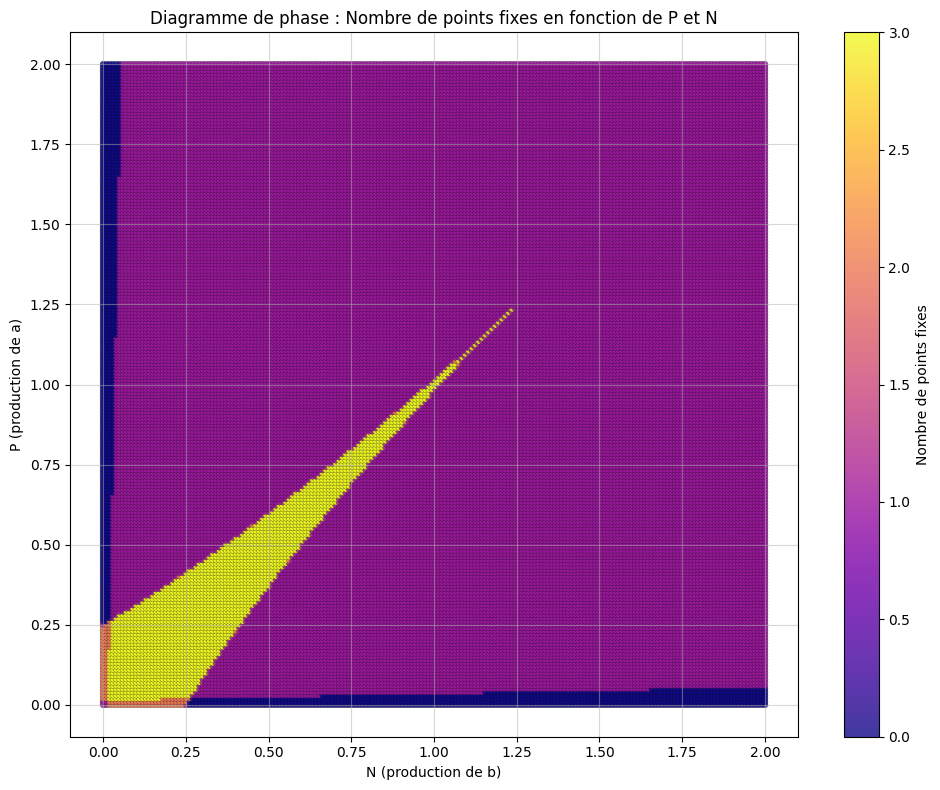

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from scipy.optimize import root

# === Paramètres ===
eta_a, eta_b = 0.1, 0.1
mu_a, mu_b = 0.2, 0.2
k_a, k_b = 0.7, 0.7
lambda_a, lambda_b = 1.0, 1.0

# === Système d'équations ===
def da_dt(a, b, P):
    return P + (lambda_a * a) / (1 + k_a * a) - eta_a * a - mu_a * a * b

def db_dt(a, b, N):
    return N + (lambda_b * b) / (1 + k_b * b) - eta_b * b - mu_b * a * b

def system(y, P, N):
    a, b = y
    return [da_dt(a, b, P), db_dt(a, b, N)]

# === Espace de paramètres P et N ===
P_vals = np.linspace(0, 2, 200)
N_vals = np.linspace(0, 2, 200)

# === Valeurs d'initialisation pour la recherche de points fixes ===
a_guesses = [0.1, 1, 5, 10]
b_guesses = [0.1, 1, 5, 10]

# === Stockage des résultats ===
bifurcation_data = []

# === Boucle principale avec barre de progression ===
print("Calcul du nombre de points fixes pour chaque (P, N)...")
for P, N in tqdm(product(P_vals, N_vals), total=len(P_vals)*len(N_vals), desc="Grille P vs N"):
    fixed_points = []
    seen = []

    for a0 in a_guesses:
        for b0 in b_guesses:
            try:
                sol = root(lambda y: system(y, P, N), [a0, b0], method='hybr')
                if sol.success:
                    a_sol, b_sol = sol.x
                    if a_sol > 0.01 and b_sol > 0.01:
                        if not any(np.hypot(a_sol - x, b_sol - y) < 0.3 for x, y in seen):
                            fixed_points.append((a_sol, b_sol))
                            seen.append((a_sol, b_sol))
            except:
                continue

    bifurcation_data.append((P, N, len(fixed_points)))

# === Conversion en tableau numpy ===
bifurcation_data = np.array(bifurcation_data)
P_plot = bifurcation_data[:, 0]
N_plot = bifurcation_data[:, 1]
fp_count = bifurcation_data[:, 2]

# === Affichage du diagramme de phase ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter( N_plot, P_plot, c=fp_count, cmap='plasma', s=20, alpha=0.8, edgecolors='k', linewidth=0.2)
cbar = plt.colorbar(scatter, label="Nombre de points fixes")
plt.xlabel("N (production de b)")
plt.ylabel("P (production de a)")
plt.title("Diagramme de phase : Nombre de points fixes en fonction de P et N")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Indeed, there exists for the system a bistable region (3 fixed points). In such region, the working range of N and P are roughly [0,1.25]

In [13]:
"""
simulate_fraction_map_with_progress.py

Sweep P and N over a 2D grid, simulate
    da/dt = P    + λ·a/(1 + kα·a) − η·a − μ·a·b
    db/dt = N    + λ̃·b/(1 + kβ·b) − η·b − μ·a·b

for each (P,N) up to time T_final, then compute the fraction
    f = a(T_final) / [a(T_final) + b(T_final)]
and plot f as a continuous heatmap.  
A tqdm progress bar shows simulation progress.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# === KINETIC PARAMETERS ===
lambda_a = 1.0   # λ
k_alpha  = 0.1   # k_α
lambda_b = 1.0   # λ̃
k_beta   = 0.1   # k_β
eta      = 0.1   # η
mu       = 0.2  # μ

# === GRID SETTINGS ===
P_min, P_max, nP = 0.0, 5.0, 50   # P axis: 0→5 in 100 steps
N_min, N_max, nN = 0.0, 5.0, 50   # N axis: 0→5 in 100 steps
P_vals = np.linspace(P_min, P_max, nP)
N_vals = np.linspace(N_min, N_max, nN)

# === SIMULATION SETTINGS ===
T_final = 30        # simulate until t = 50
y0 = [0.1, 0.1]       # [a(0), b(0)]
rtol, atol = 1e-6, 1e-9

# === Prepare fraction array ===
# frac[j,i] = a_final / (a_final + b_final)
frac = np.zeros((nN, nP))

def make_odes(P, N):
    """Return the ODE right-hand side for given P and N."""
    def odes(t, y):
        a, b = y
        da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
        db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
        return [da, db]
    return odes

# === Sweep over grid with progress bar ===
total_pts = nP * nN
pbar = tqdm(total=total_pts, desc="Simulating grid")

for i, P in enumerate(P_vals):
    for j, N in enumerate(N_vals):
        sol = solve_ivp(
            make_odes(P, N),
            [0, T_final],
            y0,
            t_eval=[T_final],
            rtol=rtol,
            atol=atol
        )
        aT, bT = sol.y[:, -1]
        frac[j, i] = aT / (aT + bT) if (aT + bT) > 0 else 0.0
        pbar.update()

pbar.close()






Simulating grid: 100%|██████████| 2500/2500 [00:26<00:00, 93.70it/s] 


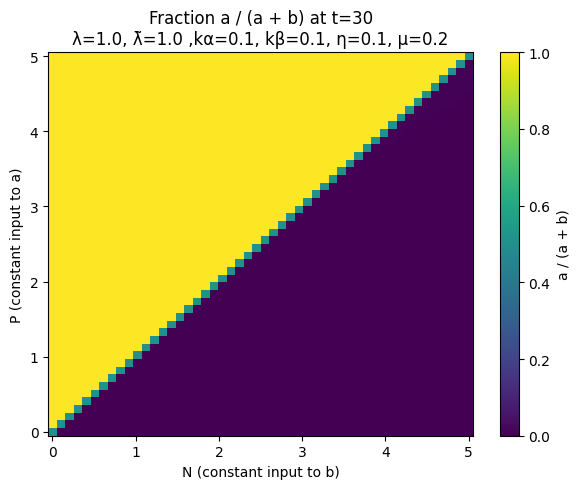

In [14]:
# === Plot the fraction heatmap with N on X-axis and P on Y-axis ===
plt.figure(figsize=(6, 5))

# Transpose frac to match axes (P on Y, N on X)
pcm = plt.pcolormesh(N_vals, P_vals, frac.T, cmap='viridis', shading='auto')

plt.xlabel('N (constant input to b)')     # X-axis
plt.ylabel('P (constant input to a)')     # Y-axis
plt.title(
    f'Fraction a / (a + b) at t={T_final}\n'
    f'λ={lambda_a}, λ̃={lambda_b} ,kα={k_alpha}, kβ={k_beta}, η={eta}, μ={mu}'
)

cbar = plt.colorbar(pcm)
cbar.set_label('a / (a + b)')

plt.tight_layout()
plt.show()



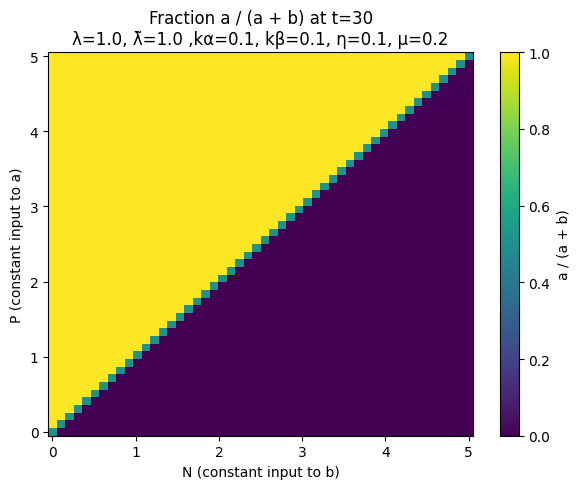

Simulating x_p2 vs x_n2: 100%|██████████| 2500/2500 [00:40<00:00, 61.31it/s]


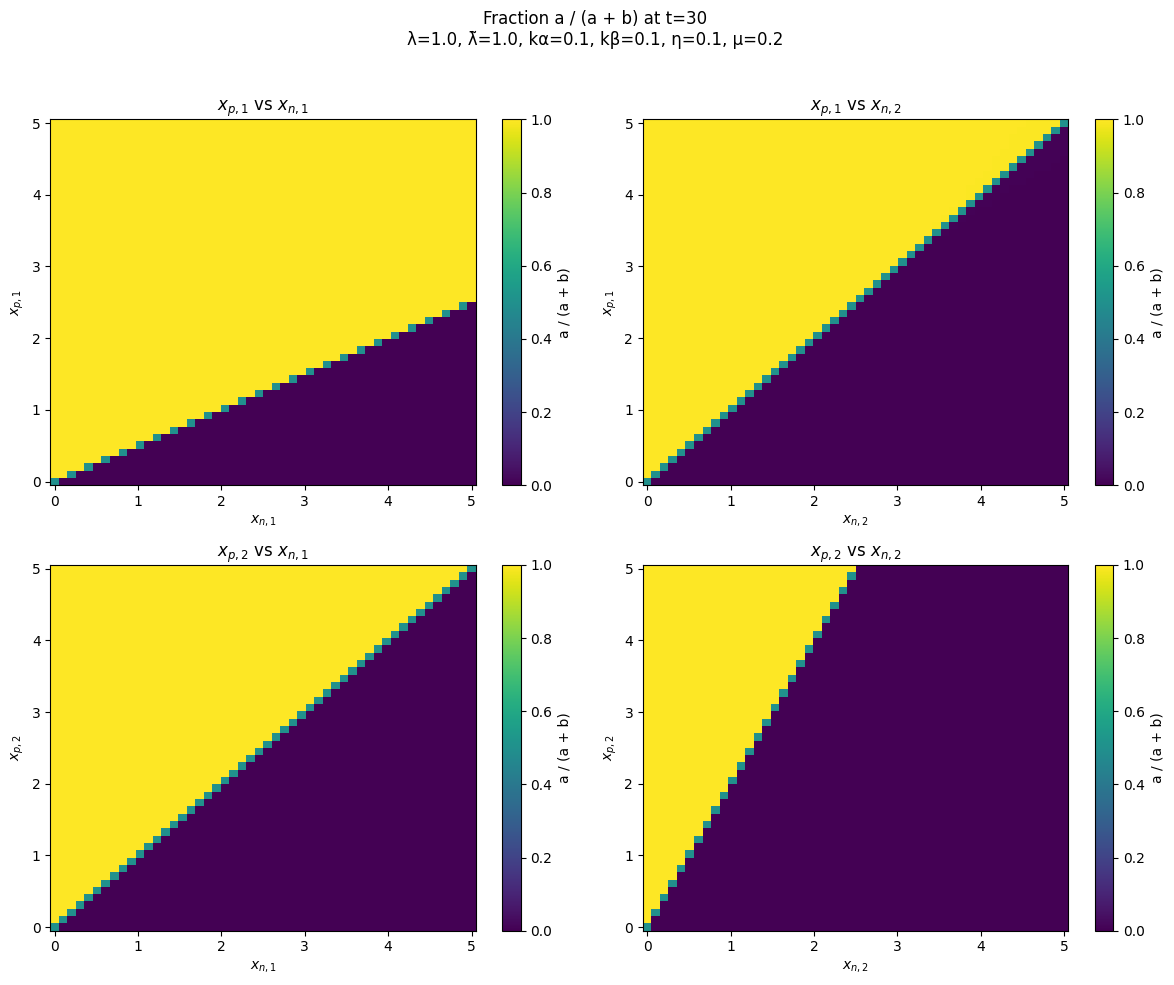

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# === PARAMETERS ===
lambda_a = 1.0
k_alpha  = 0.1
lambda_b = 1.0
k_beta   = 0.1
eta      = 0.1
mu       = 0.2

# === WEIGHTS ===
w_p = np.array([1.0, 0.5])  # weights for x_p1, x_p2
w_n = np.array([0.5, 1.0])  # weights for x_n1, x_n2

# === GRID SETTINGS ===
x_min, x_max, nx = 0.0, 5.0, 50
x_vals = np.linspace(x_min, x_max, nx)

# === SIMULATION SETTINGS ===
T_final = 30
y0 = [0.1, 0.1]
rtol, atol = 1e-6, 1e-9

# === ODE function ===
def make_odes(P, N):
    def odes(t, y):
        a, b = y
        da = P + (lambda_a * a) / (1 + k_alpha * a) - eta * a - mu * a * b
        db = N + (lambda_b * b) / (1 + k_beta * b) - eta * b - mu * a * b
        return [da, db]
    return odes

# === Create figure for 4 subplots ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# === Loop over i, j = 1,2 ===
for idx, (i, j) in enumerate([(0,0), (0,1), (1,0), (1,1)]):  # python indices: 0 or 1
    frac = np.zeros((nx, nx))  # reset for each (i,j)
    
    pbar = tqdm(total=nx*nx, desc=f"Simulating x_p{i+1} vs x_n{j+1}")
    
    for xi, x_pi in enumerate(x_vals):
        for xj, x_nj in enumerate(x_vals):
            # Build x_p and x_n vectors
            x_p = np.zeros(2)
            x_n = np.zeros(2)
            x_p[i] = x_pi   # only x_p,i varies
            x_n[j] = x_nj   # only x_n,j varies

            # Compute P and N
            P = np.dot(w_p, x_p)
            N = np.dot(w_n, x_n)

            # Solve ODE
            sol = solve_ivp(
                make_odes(P, N),
                [0, T_final],
                y0,
                t_eval=[T_final],
                rtol=rtol,
                atol=atol
            )
            aT, bT = sol.y[:, -1]
            frac[xj, xi] = aT / (aT + bT) if (aT + bT) > 0 else 0.0
            pbar.update()
    
    pbar.close()

    # === Plot heatmap ===
    pcm = axes[idx].pcolormesh(x_vals, x_vals, frac.T, cmap='viridis', shading='auto')
    axes[idx].set_xlabel(rf'$x_{{n,{j+1}}}$')
    axes[idx].set_ylabel(rf'$x_{{p,{i+1}}}$')
    axes[idx].set_title(rf'$x_{{p,{i+1}}}$ vs $x_{{n,{j+1}}}$')

    fig.colorbar(pcm, ax=axes[idx], label='a / (a + b)')

plt.suptitle(
    f'Fraction a / (a + b) at t={T_final}\n'
    f'λ={lambda_a}, λ̃={lambda_b}, kα={k_alpha}, kβ={k_beta}, η={eta}, μ={mu}'
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
